# 산술평균

In [1]:
import numpy as np

data=[10,20,30,40,50]
mean_value=np.mean(data)
print(mean_value)

30.0


# 기하,조화평균 & 가중치부여

In [ ]:
from scipy.stats import hmean,gmean
gmean(data) #기하평균

np.float64(26.051710846973528)

In [ ]:
hmean(data) #조화평균

np.float64(21.8978102189781)

In [4]:
prices=[5000,9000]
counts=[8,2]  #가중치부여

np.average(prices,weights=counts)

np.float64(5800.0)

# 중앙값

In [5]:
import numpy as np

data = [10, 20, 30, 40, 50]
median_value = np.median(data)
print(median_value)  # 30

30.0


# 백분위수

In [13]:
import numpy as np

scores= [65,75,80,85,95]
p25=np.percentile(scores,25) #Q1
P50=np.percentile(scores,50) #Q2
p75=np.percentile(scores,75) #Q3
p25, P50, p75

(np.float64(75.0), np.float64(80.0), np.float64(85.0))

In [ ]:
#IQR: 사분위범위 Q3-Q1=85-75=10


# 최빈값

In [14]:
import pandas as pd

data=pd.Series([1,2,2,3,3,3,4,4])
mode_value=data.mode()
print(mode_value)

0    3
dtype: int64


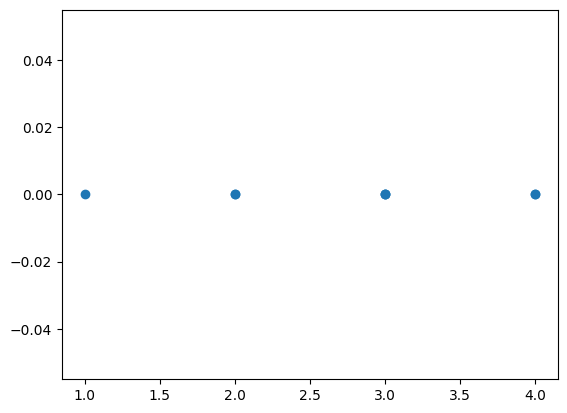

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data,np.zeros_like(data))

In [21]:
import seaborn as sns

vp_df=sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
#범위 계산하기

vp_df['sepal_length'].max()-vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [ ]:
#모든 속성의 범위를 확인

cols=['sepal_length','sepal_width','petal_length', 'petal_width']
ranges=vp_df[cols].apply(lambda x:x.max() - x.min())
ranges

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [26]:
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') !=-1:
        print(i.name)

Gulim
New Gulim


In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False  

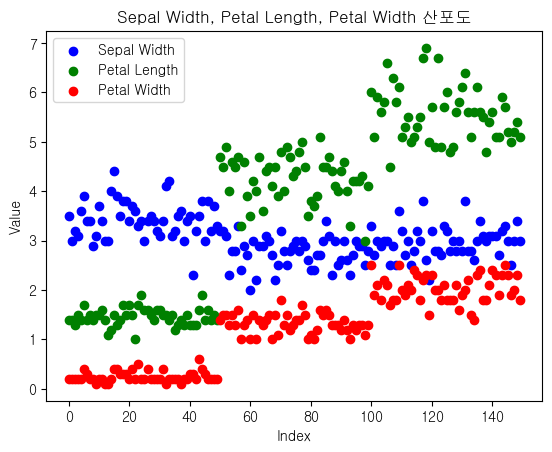

In [36]:
import matplotlib.pyplot as plt

plt.scatter(vp_df.index, vp_df['sepal_width'], label='Sepal Width', color='blue')
plt.scatter(vp_df.index, vp_df['petal_length'], label='Petal Length', color='green')
plt.scatter(vp_df.index, vp_df['petal_width'], label='Petal Width', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sepal Width, Petal Length, Petal Width 산포도')
plt.legend()
plt.show()

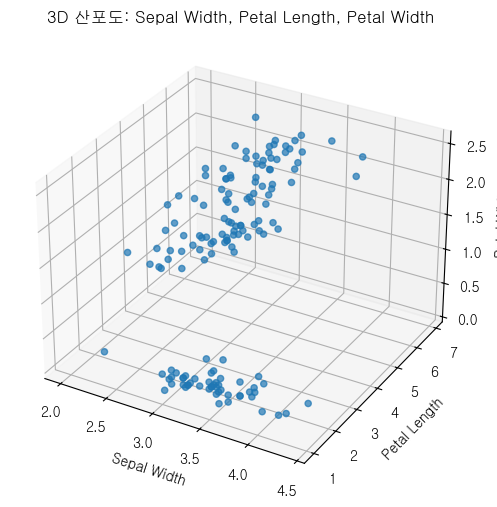

In [34]:
#산포도로 변동성 확인하기

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    vp_df['sepal_width'],
    vp_df['petal_length'],
    vp_df['petal_width'],
    alpha=0.7
)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.set_title('3D 산포도: Sepal Width, Petal Length, Petal Width')

plt.show()

# 분산

In [ ]:
import numpy as np

data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0  ,분산이 클수록 데이터가 평균값 주변에 많이 흩어져 있다

200.0


# 표준편차

In [ ]:
import numpy as np

std_dev = np.std(data)
print(std_dev)  # 14.14 
#표준편차가 클수록 데이터의 변동성이 크다

14.142135623730951


In [40]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

In [42]:
bins=np.arange(0,240,10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

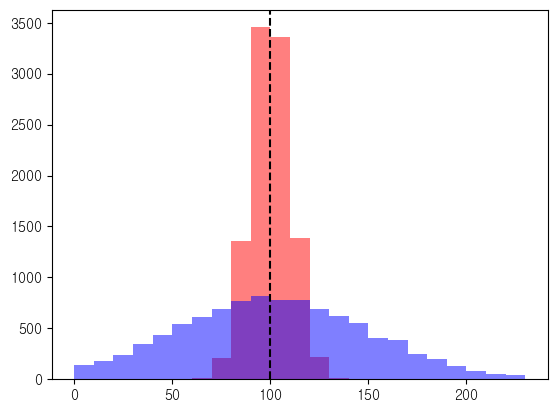

In [45]:
plt.hist(data1,bins=bins, color='red',alpha=0.5)
plt.hist(data2, bins=bins, color='blue',alpha=0.5)


#평균값 표기
plt.axvline(mu, color='black',linestyle='--')

### 분산이나 표준편차가 크면 그래프가 완만하고 폭이 넓음
### 빨강은 분산과 표준편차가 작고, 파랑은 분산과 표준편차가 큼

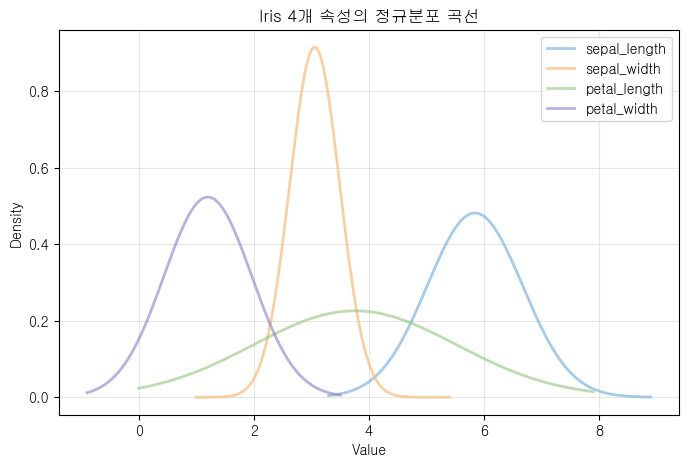

In [53]:
# iris dataset 속성들의 표준편차 비교분석
import numpy as np
import matplotlib.pyplot as plt

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#6fa8dc', '#f6b26b', '#93c47d', '#8e7cc3']

plt.figure(figsize=(8,5))

for col, color in zip(cols, colors):
    data = vp_df[col]
    mu = data.mean()
    std = data.std()
    x = np.linspace(data.min() - 1, data.max() + 1, 200)
    y = (1/(std * np.sqrt(2 * np.pi))) * np.exp(- (x - mu) ** 2 / (2 * std ** 2))
    plt.plot(x, y, label=col, color=color, alpha=0.6, linewidth=2)

plt.title('Iris 4개 속성의 정규분포 곡선')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [52]:
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

summ = pd.DataFrame({'Q1' : Q1,
                     'Q3' : Q3,
                     'IQR' : IQR})
summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


- 가장 분산이 큰 변수: petal_length
- 가장 분산이 작은 변수: sepal_width
- 결론: 품종을 분류할 때, petal_length가 민감하게 작용할 것이다.
- IQR의 크기가 클수록 허용범위가 크다

# 분포의 모양,형태
- 모양이 정규분포인지
- 치우쳐져 있는지
- 특이한 패턴이 있는가 ex)쌍봉

In [73]:
# 빈도분포표
import pandas as pd
from io import StringIO

data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20]
]

df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
print(df)

    A   B   C   D   E
0  47  10  31  25  20
1   2  11  31  25  21
2  44  14  15  26  21
3  41  14  16  26  21
4   7  30  17  27  24
5   6  30  16  29  24
6  35  32  15  29  23
7  38  33  19  28  20
8  35  34  18  29  21
9  36  32  16  27  20


- 각 변수의 분포 형태: 5개의 변수
- 값의 범위, 도수가 많은 구간(count) 빈도
- 이상치 유무

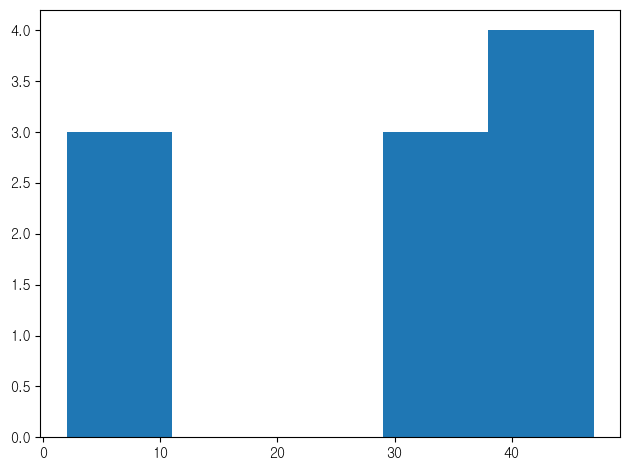

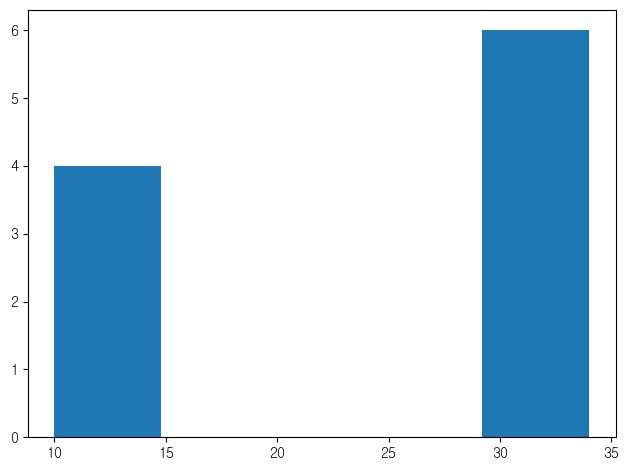

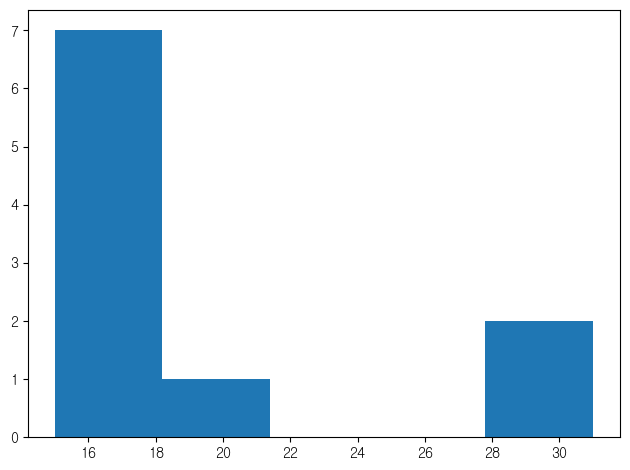

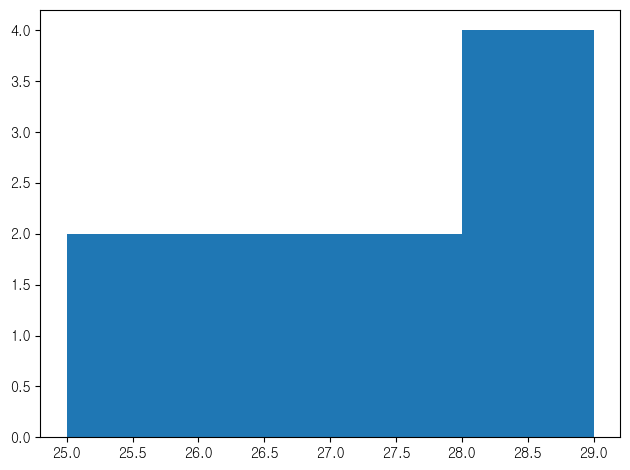

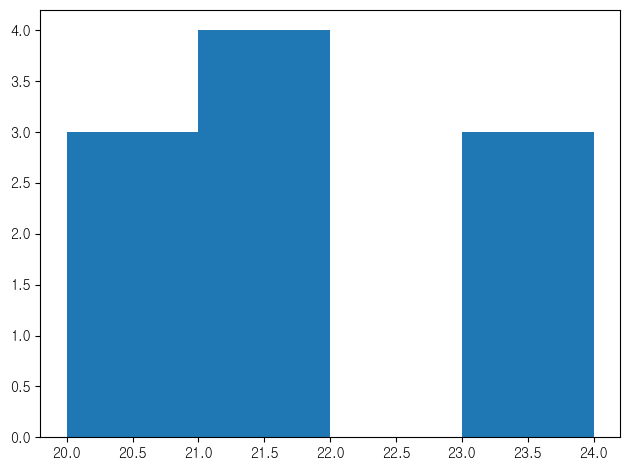

In [74]:
#각 속성별 히스토그램

for col in df.columns:
    plt.hist(df[col], bins='sturges')
    plt.tight_layout()
    plt.show()

# 첨도

In [75]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


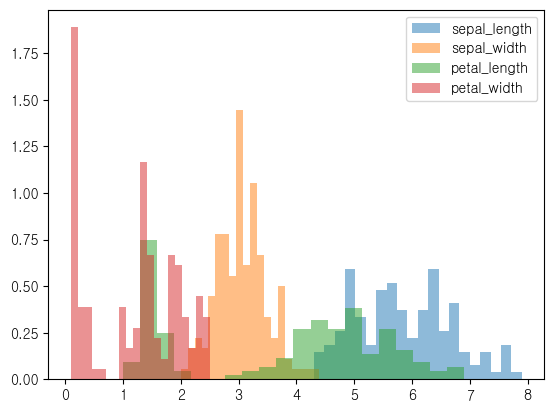

In [77]:
# 'iris data'로 첨도의 계산1
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])
bins=20
for col in numeric_df.columns:
  plt.hist(numeric_df[col], bins=bins, alpha=0.5, label=col, density=True)

plt.legend()
plt.show()

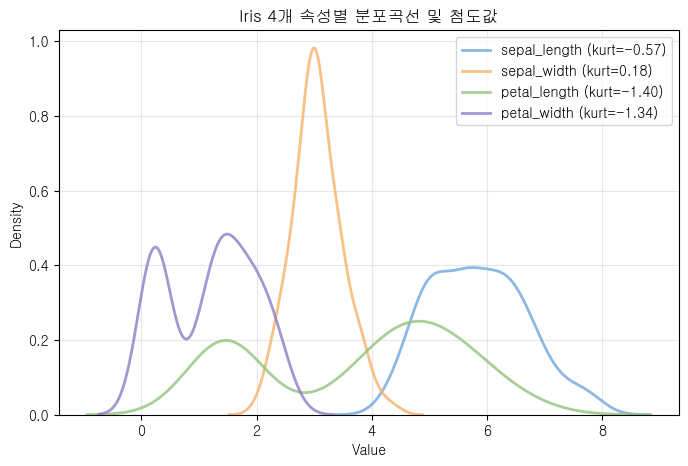

In [78]:
# 'iris data'로 첨도의 계산2
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#6fa8dc', '#f6b26b', '#93c47d', '#8e7cc3']

plt.figure(figsize=(8, 5))

for idx, (col, color) in enumerate(zip(cols, colors)):
    # 분포 곡선
    sns.kdeplot(vp_df[col], label=f"{col} (kurt={kurtosis(vp_df[col]):.2f})", color=color, linewidth=2, alpha=0.8)
    # 첨도값 텍스트로 plot에 직접 쓰고 싶다면 아래 코드 사용(위는 legend로 표시)
    # kurt = kurtosis(vp_df[col])
    # x_pos = vp_df[col].mean()
    # y_pos = plt.gca().get_ylim()[1] * (0.8 - idx*0.2)
    # plt.text(x_pos, y_pos, f'kurtosis: {kurt:.2f}', color=color, fontsize=10)

plt.title('Iris 4개 속성별 분포곡선 및 첨도값')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 양의 첨도>3
 - 뾰족하고, 중심이 높음(봉우리가 솟아있음)
 - 데이터가 평균 주위에 밀집하고, 양쪽 끝에 이상치 많음
 ### 음의 첨도<3
- 평평하고, 중심이 낮음(봉우리가 완만)
-  데이터가 넓게 퍼짐

In [76]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리)

1.1384199576606167


### 양의 왜도
 - 오른쪽(큰 값)으로 꼬리가 길다
### 음의 왜도
 - 왼쪽(작은 값)으로 꼬리가 길다